<a href="https://colab.research.google.com/github/ramezanis/notebook/blob/main/Predict_Salary_in_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#The goal is to predict data Salary from each position in any location
from google.colab import files

In [2]:
uploaded = files.upload()

Saving df.csv to df.csv


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
df = pd.read_csv('df.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [6]:
df

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...
5887,Manufacturing Data Analyst Engineer,$42K - $76K (Glassdoor est.),3.6,Hose Master\n3.6,"Euclid, OH",201 to 500 Employees,1982,Company - Private,Electrical & Electronic Manufacturing,Manufacturing,Unknown / Non-Applicable
5888,Data Scientist,-1,4.9,Bluetree Network\n4.9,"Madison, WI",-1,-1,-1,-1,-1,-1
5889,Supply Chain Consultant - Data Scientist,-1,4.0,"Kimberly-Clark Corporation, LLC\n4.0","Neenah, WI",10000+ Employees,1872,Company - Public,Consumer Products Manufacturing,Manufacturing,$10+ billion (USD)
5890,Data Science Engineer,-1,4.0,AE Business Solutions\n4.0,"Madison, WI",51 to 200 Employees,1949,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD)


In [7]:
# Clean data:
# Create an Average salary column from a Salary Estimate
# Conversat location to state
# Reduce Job title
# Delete negative rows Rating

In [8]:
df = df[df['Salary Estimate']!= '-1']

In [9]:
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [10]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$',' '))
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K',' '))

In [11]:
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split())

In [12]:
df['Salary Estimate']

0       [111, -, 181, (Glassdoor, est.)]
1       [111, -, 181, (Glassdoor, est.)]
2       [111, -, 181, (Glassdoor, est.)]
3       [111, -, 181, (Glassdoor, est.)]
4       [111, -, 181, (Glassdoor, est.)]
                      ...               
5881      [38, -, 64, (Glassdoor, est.)]
5882      [47, -, 89, (Glassdoor, est.)]
5883     [66, -, 113, (Glassdoor, est.)]
5886     [67, -, 111, (Glassdoor, est.)]
5887      [42, -, 76, (Glassdoor, est.)]
Name: Salary Estimate, Length: 5500, dtype: object

In [13]:
df['Min_Salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[-3])

In [14]:
df['Min_Salary'] = df['Min_Salary'].astype(int)
df['Max_salary'] = df['Max_salary'].apply(lambda x:int(x))
df['Average_Salary'] = (df['Min_Salary']+ df['Max_salary'])/2

In [15]:
df['State'] = df['Location'].apply(lambda x: x.split()[-1])
df = df[df['State']!='Kingdom']

In [16]:
def Job_Stablization(x):
  x = x.lower()
  if ('data science' in x) or ('data scientist' in x):
    return 'data scientist'
  elif 'analyst' in x:
    return 'data analyst'
  elif 'engineer' in x:
    return 'data engineer'
  elif 'manager' in x:
    return 'manager'
  elif 'machine learning' in x:
    return'machine learning engineer'
  elif 'business intelligence' in x:
    return 'BI analyst'
  elif 'architect' in x:
    return 'data architect'
  elif 'supervisor' in x:
    return 'supervisor'
  else:
    return 'other'

In [17]:
df['Job Title'] = df['Job Title'].apply(Job_Stablization)

In [18]:
df = df[df['Rating']!=-1]

In [19]:
df_cleaned = df[['Job Title','Rating','Average_Salary','State']]

In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_Salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


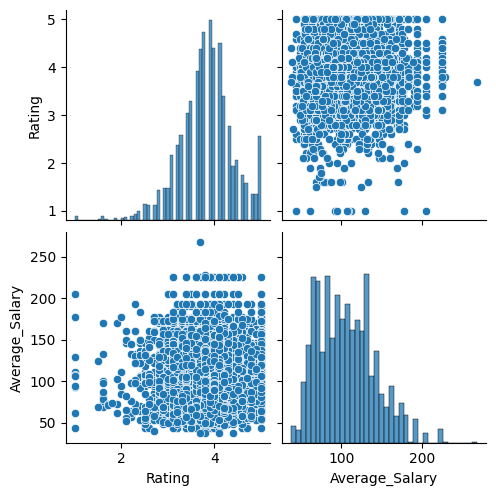

In [21]:
#EDA(Exploratory Data Analysis)
sns.pairplot(df_cleaned)

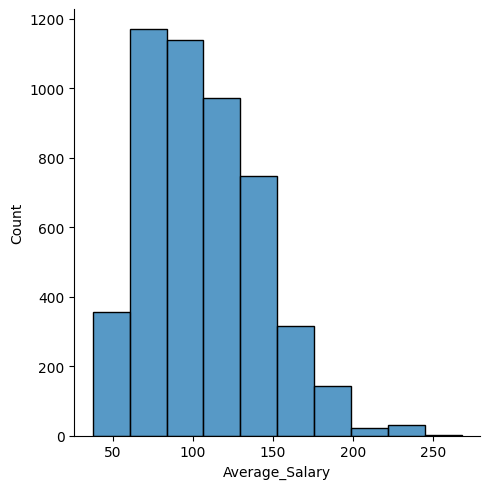

In [22]:
sns.displot(data=df_cleaned,x='Average_Salary',bins=10)

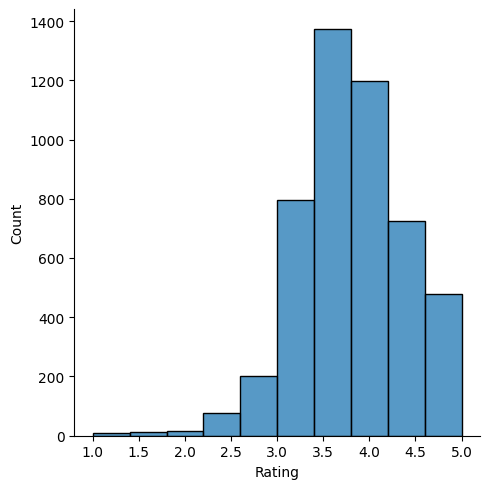

In [23]:
sns.displot(data=df_cleaned,x='Rating',bins=10)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'data scientist'),
  Text(1, 0, 'data analyst'),
  Text(2, 0, 'other'),
  Text(3, 0, 'data engineer'),
  Text(4, 0, 'manager'),
  Text(5, 0, 'machine learning engineer'),
  Text(6, 0, 'data architect'),
  Text(7, 0, 'supervisor')])

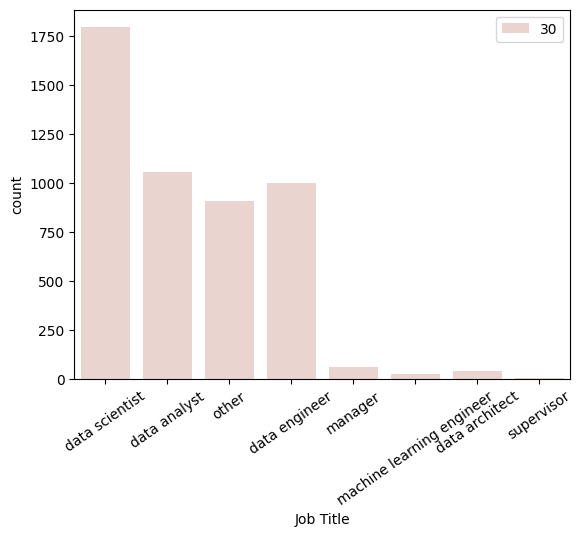

In [24]:
sns.countplot(data=df_cleaned,x='Job Title',hue=30)
plt.xticks(rotation=35)

<Axes: xlabel='Rating', ylabel='Average_Salary'>

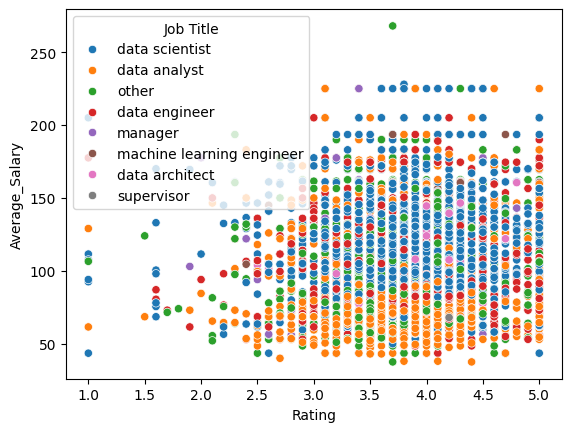

In [25]:
sns.scatterplot(data=df_cleaned,x='Rating',y='Average_Salary',hue='Job Title')

In [26]:
# Future engineering for ML model
preprosses_df = pd.get_dummies(df_cleaned,columns=['Job Title','State'])
x = preprosses_df.drop(columns='Average_Salary')
y = preprosses_df['Average_Salary']

In [27]:
#Modeling
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
print(lr.intercept_) #b0 in y=b1x+b0

-560748897297649.25


In [31]:
print(lr.coef_) #b1 in y=b1x+b0

[2.34071193e+00 5.26823713e+14 5.26823713e+14 5.26823713e+14
 5.26823713e+14 5.26823713e+14 5.26823713e+14 5.26823713e+14
 5.26823713e+14 3.39251845e+13 3.39251845e+13 3.39251845e+13
 3.39251845e+13 3.39251845e+13 3.39251845e+13 3.39251845e+13
 3.39251845e+13 3.39251845e+13 3.39251845e+13 3.39251845e+13
 3.39251845e+13 3.39251845e+13 3.39251845e+13 3.39251845e+13
 3.39251845e+13 3.39251845e+13 3.39251845e+13 3.39251845e+13
 3.39251845e+13 3.39251845e+13 3.39251845e+13 3.39251845e+13]


In [32]:
prediction = lr.predict(x_test)
prediction

array([ 88.625 , 124.1875,  89.625 , ...,  83.1875,  91.    ,  91.9375])

<Axes: xlabel='Average_Salary'>

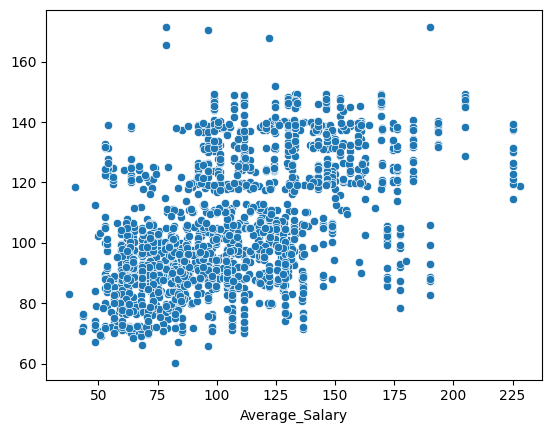

In [33]:
sns.scatterplot(x=y_test,y=prediction)

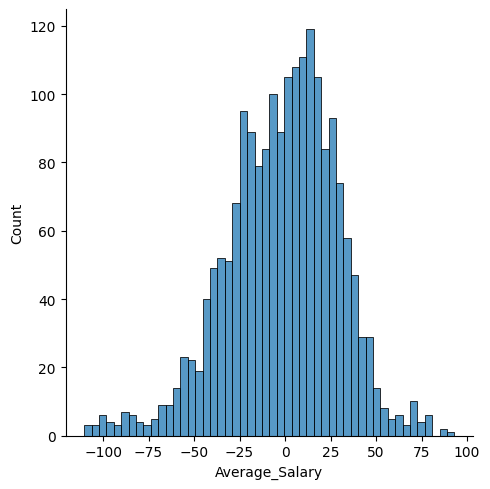

In [34]:
residual = (prediction - y_test)
sns.displot(residual,bins=50);

In [35]:
print('MAE:',mean_absolute_error(y_test,prediction))

MAE: 23.906585334695965


In [36]:
pickle.dump(lr,open('Predict_salary.pkl','wb'))